In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# !wget https://raw.githubusercontent.com/ipython-books/minibook-2nd-data/master/nyc_taxi.zip
# !unzip nyc_taxi.zip

In [5]:
# %ls data
# !rm nyc_taxi.zip
# %pwd
# %ls
# The nyc_data.csv file contains information about the rides, whereas nyc_fare.csv contains information about the fares.

In [3]:
data_filename = 'data/nyc_data.csv'
fare_filename = 'data/nyc_fare.csv'

In [4]:
data = pd.read_csv(data_filename,parse_dates=['pickup_datetime','dropoff_datetime'])
fare = pd.read_csv(fare_filename,parse_dates=['pickup_datetime'])

In [7]:
data.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392


In [8]:
# The describe() method shows basic statistics of all columns
data.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592


In [9]:
data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [11]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

p_lng.head()

0   -73.955925
1   -74.005501
2   -73.969955
3   -73.991432
4   -73.966225
Name: pickup_longitude, dtype: float64

In [12]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [14]:
px, py = lat_lng_to_pixels(p_lat, p_lng)
px.head()

0    29.456688
1    29.442916
2    29.452790
3    29.446824
4    29.453826
Name: pickup_longitude, dtype: float64

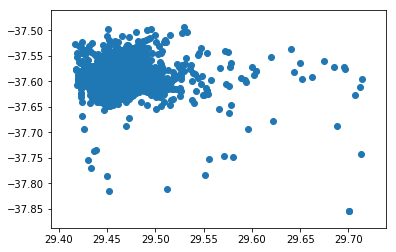

In [15]:
plt.scatter(px, py)

(29.399999999999999,
 29.550000000000001,
 -37.630000000000003,
 -37.539999999999999)

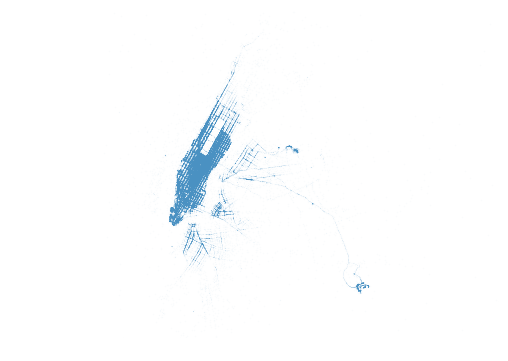

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(px, py, s=.1, alpha=.03)
plt.axis('equal')    # use an equal aspect ratio with axis('equal')
plt.xlim(29.40, 29.55)    # zoom in by specifying the limits of the x and y axes
plt.ylim(-37.63, -37.54)
plt.axis('off')

In [17]:
# Descriptive statistics with pandas and seaborn
px.count(), px.min(), px.max()

(846945, 29.417137499999995, 29.714313055555561)

In [18]:
px.mean(), px.median(), px.std()

(29.451345807768575, 29.449418333333337, 0.0097616942744512686)

In [20]:
# Several projects aim to offer higher-level, simpler user interfaces for high-quality plotting. Seaborn is one of them.
# !conda install -n venv_conda seaborn -q -y

In [19]:
import seaborn as sns
sns.__version__

'0.7.1'

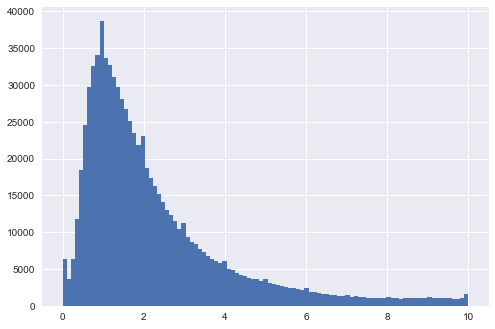

In [21]:
# Let's display a histogram of the trip distances. pandas provides a few simple plotting methods for DataFrame and Series 
# objects. These methods are based on matplotlib, and benefit from the seaborn styling if seaborn has been imported.
data.trip_distance.hist(bins=np.linspace(0., 10., 100))

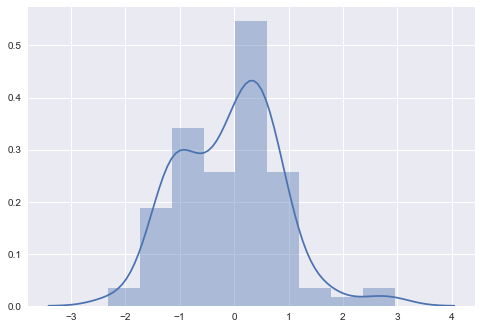

In [22]:
# From: http://seaborn.pydata.org/tutorial/distributions.html
# Plotting univariate distributions
x = np.random.normal(size=100)
sns.distplot(x);

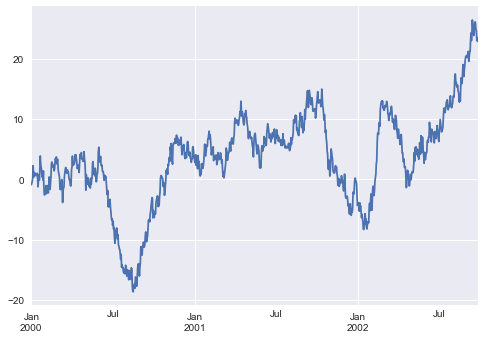

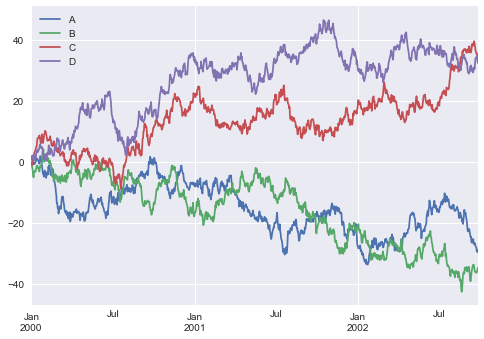

In [23]:
# From: http://pandas.pydata.org/pandas-docs/stable/visualization.html
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure(); df.plot();

---
# Manipulating data
Visualizing raw data and computing basic statistics is particularly easy with pandas.
All we have to do is choose a couple of columns in a DataFrame and use built-in
statistical or visualization functions.
However, more sophisticated data manipulations methods quickly become necessary
as we explore a dataset. In this section, we will first see how to make selections
of a DataFrame. Then, we will see how to efficiently make transformations and
computations on columns.

---

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('data/nyc_data.csv',
parse_dates=['pickup_datetime',
'dropoff_datetime'])
fare = pd.read_csv('data/nyc_fare.csv',
parse_dates=['pickup_datetime'])

In [25]:
data[['trip_distance', 'trip_time_in_secs']].head(3)

,trip_distance,trip_time_in_secs
0,0.61,300
1,3.28,960
2,1.50,386


In [26]:
data.loc[0]

medallion             76942C3205E17D7E7FE5A9F709D16434
hack_license          25BA06A87905667AA1FE5990E33F0E2E
vendor_id                                          VTS
rate_code                                            1
store_and_fwd_flag                                 NaN
pickup_datetime                    2013-01-01 00:00:00
dropoff_datetime                   2013-01-01 00:05:00
passenger_count                                      3
trip_time_in_secs                                  300
trip_distance                                     0.61
pickup_longitude                              -73.9559
pickup_latitude                                40.7819
dropoff_longitude                             -73.9632
dropoff_latitude                               40.7778
Name: 0, dtype: object

In [27]:
data.loc[[0,100000]]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
100000,7461F7106D33D3A5775F4245724606FD,BACEA353BB4106A005BB7836BDCAC0C3,VTS,1,NaN,2013-02-12 18:10:00,2013-02-12 18:20:00,2,600,2.02,-73.966454,40.770512,-73.958862,40.778042


In [28]:
data.loc[1000:2000:10,['trip_distance', 'trip_time_in_secs']]

,trip_distance,trip_time_in_secs
1000,1.00,441
1010,3.80,691
1020,0.00,7
1030,4.20,902
1040,3.40,1278
1050,1.00,242
1060,1.48,300
1070,3.03,600
1080,0.60,135
1090,2.80,780


In [30]:
data.loc?

In [29]:
# Filtering with boolean indexing
data.loc[data.trip_distance>100, ['trip_distance', 'trip_time_in_secs']]

,trip_distance,trip_time_in_secs
504497,6005123.0,631
507107,181.8,4290965
548988,442.0,1
558665,164.4,6640


In [31]:
# Interactive filter
from ipywidgets import interact
@interact
def show_nrows(distance_threshold=(0, 200)):
    return len(data.loc[data.trip_distance > distance_threshold])

In [32]:
data.cumsum?

--- 
# Computing with numbers

The trip_time_in_secs column contains the trip durations in seconds. How can we
convert these values to minutes? More generally, how can we make computations on
DataFrames?
A first approach would be to use a for loop, iterating over all rows and making
numerical computations successively inside that loop. This is what people with a
background in the C programming language tend to do when they start to learn
Python. However, this isn't the best way to do things in Python.

---

In [33]:
data['trip_time_in_mins'] = data.trip_time_in_secs / 60.0
data[['trip_time_in_secs', 'trip_time_in_mins']].head(3)
data['trip_time_in_hours'] = data.trip_time_in_mins / 60.0
data[['trip_time_in_secs', 'trip_time_in_mins', 'trip_time_in_hours']].head(3)

,trip_time_in_secs,trip_time_in_mins,trip_time_in_hours
0,300,5.000000,0.083333
1,960,16.000000,0.266667
2,386,6.433333,0.107222


In [34]:
data.loc[data.trip_distance > 100, ['trip_time_in_secs', 'trip_time_in_mins', 'trip_time_in_hours']]

,trip_time_in_secs,trip_time_in_mins,trip_time_in_hours
504497,631,10.516667,0.175278
507107,4290965,71516.083333,1191.934722
548988,1,0.016667,0.000278
558665,6640,110.666667,1.844444


In [35]:
a = data.trip_distance[:5]
b = data.trip_distance[2:6]
a + b

0     NaN
1     NaN
2    3.00
3    0.00
4    2.62
5     NaN
Name: trip_distance, dtype: float64

In [36]:
# Working with text

data.medallion.head(3)

0    76942C3205E17D7E7FE5A9F709D16434
1    517C6B330DBB3F055D007B07512628B3
2    ED15611F168E41B33619C83D900FE266
Name: medallion, dtype: object

In [37]:
data.medallion.str.slice(0, 4).head(3)

# More: http://pandas.pydata.org/pandas-docs/stable/text.html

0    7694
1    517C
2    ED15
Name: medallion, dtype: object

---

# Working with dates and times

pandas provides many methods to operate on dates and times. Common operations
include:
* getting the day, day of week, hour, or any other quantity from dates
* selecting ranges of dates
* computing time ranges
* dealing with different time zones

---

In [38]:
# The dt attribute of datetime objects gives us access to datetime components. For example, here is how to get the day of the week of the taxi trips (Monday=0,Sunday=6):
data.pickup_datetime.dt.dayofweek[::200000]

0         1
200000    6
400000    5
600000    0
800000    1
Name: pickup_datetime, dtype: int64

In [39]:
# Let's select all night trips that finished the next day:
day_p = data.pickup_datetime.dt.day
day_d = data.dropoff_datetime.dt.day
selection = (day_p != day_d)
print(len(data.loc[selection]))
data.loc[selection].head(3)

7716


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_time_in_mins,trip_time_in_hours
2005,6385CA8C99985BFBAFB477A9BDFA28C9,08A78365909D2F09BF72B869C0B21FED,VTS,1,NaN,2013-01-01 23:45:00,2013-01-02 00:03:00,1,1080,12.61,-73.873062,40.774128,-73.983597,40.721539,18.000000,0.300000
2008,D932DC772B89F69D30F03FB095424F97,F5AE2E36090433DFE4142AFC19AFD495,CMT,1,N,2013-01-01 23:46:22,2013-01-02 00:28:01,1,2498,16.10,-73.781921,40.644657,-73.998512,40.660194,41.633333,0.693889
2010,33BB4B9DBFD87B7522909FEEB84896F4,412253C6258AF9DCE2D27DE714A84049,CMT,1,N,2013-01-01 23:46:53,2013-01-02 00:03:33,1,1000,5.40,-74.001274,40.725952,-73.980347,40.660503,16.666667,0.277778


---
# Handling missing data

* isnull() indicates whether values are null or not
* notnull() indicates the opposite
* dropna() removes missing data
* fillna(some_default_value) replaces missing data with a default value

---
# Complex operations

We've seen how to load, select, filter, and operate on data with pandas. In this
section, we will show more complex manipulations that are typically done on full-
blown databases based on SQL.

---

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
data = pd.read_csv('data/nyc_data.csv',parse_dates=['pickup_datetime','dropoff_datetime'])
fare = pd.read_csv('data/nyc_fare.csv',parse_dates=['pickup_datetime'])

In [41]:
# Group-by
weekly = data.groupby(data.pickup_datetime.dt.weekofyear)
len(weekly)

52

In [42]:
weekly.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597
12736,98C1BBAD5CAA169896BBCA5D98A5358F,107F6FA670D90C3F7CCCDB18283D1385,VTS,1,NaN,2013-01-07 00:03:00,2013-01-07 00:18:00,3,900,3.31,-73.973656,40.763859,-73.967827,40.801338
12737,AB715D0455C3D9C66CF59BE0E961BCD9,824C238C09075217A33FEEBD0D636545,CMT,1,N,2013-01-07 00:03:03,2013-01-07 00:06:06,1,183,0.90,-73.962685,40.804722,-73.952896,40.810852
12738,280558187136417F2FBF5B544476C2EC,D72218B7352CF55A4B160527832B679A,VTS,2,NaN,2013-01-07 00:04:00,2013-01-07 00:29:00,1,1500,1.79,-73.789558,40.647060,-73.941795,40.814545
12739,6A7F52F89B51ACCE77D8F137B1F096C9,47939637E62B828271D87F61ADA9494D,VTS,1,NaN,2013-01-07 00:04:00,2013-01-07 00:23:00,4,1140,8.97,-73.975967,40.757298,-73.844765,40.720272
12740,EE8A432D5218B302DD64AE2F706C94E7,39335A2603971B512C744979A924B5A3,CMT,1,N,2013-01-07 00:04:08,2013-01-07 00:16:53,1,765,6.90,-73.874664,40.774120,-73.946808,40.800350


In [43]:
y = weekly.size()
y.head(3)

pickup_datetime
1    17042
2    15941
3    17017
dtype: int64

In [44]:
# We'll now plot the number of rides per week. To create a meaningful plot, we first need to specify the appropriate x-axis with the dates of all 52 weeks:
x = weekly.pickup_datetime.first()
x.head(3)
# This Series contains the date of the first item in every row.

pickup_datetime
1   2013-01-01 00:00:00
2   2013-01-07 00:03:00
3   2013-01-14 00:00:51
Name: pickup_datetime, dtype: datetime64[ns]

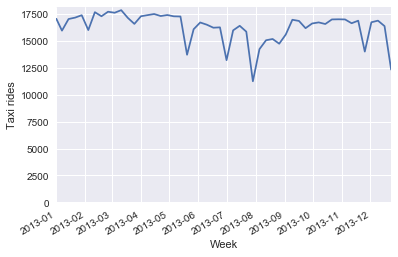

In [45]:
pd.Series(y.values, index=x).plot()
plt.ylim(0)
# Set the lower y value to 0.
plt.xlabel('Week')
# Label of the x axis.
plt.ylabel('Taxi rides')
# Label of the y axis.

In [46]:
# Joins
    # First, from the fare DataFrame, we will get the average tip obtained by each taxi. 
    # Then, we'll inject this information into the data DataFrame.

# For the first step, we use groupby()
tip = fare[['medallion', 'tip_amount']] \
.loc[fare.tip_amount>0].groupby('medallion').mean()
print(len(tip))
tip.head(10)



13407


,tip_amount
medallion,
00005007A9F30E289E760362F69E4EAD,1.815854
000318C2E3E6381580E5C99910A60668,2.857222
000351EDC735C079246435340A54C7C1,2.099111
0009986BDBAB2F9A125FEF49D0BFCCDD,2.220000
00115F46520039845A5F719C979BEA45,3.422222
00153E36140C5B2A84EA308F355A7925,2.704687
001C8EC421C9BE57D08576617465401A,2.895455
001D3B86C2ACDEE4D1B98AFE52969F3D,2.520455
001DFAC01BC0A32F48C3769DD1414778,2.164865


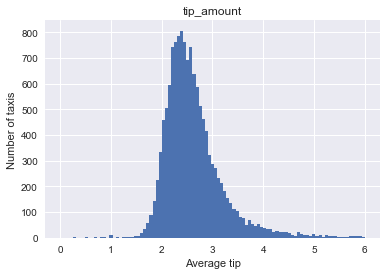

In [47]:
tip.hist(bins=np.linspace(0., 6., 100))
plt.xlabel('Average tip')
plt.ylabel('Number of taxis')

In [48]:
# The next step is to reinject this tip DataFrame into the data DataFrame. The
# medallion column appears in both of our datasets; by identifying this special field
# (also called the key) in both datasets, we can associate every row in tip to a row in
# data.

data_merged = pd.merge(data, tip, how='left', left_on='medallion', right_index=True)
data_merged.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,tip_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832,3.180417
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722,2.863235
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392,2.147143


Finally, here are a few more advanced topics in pandas that are worth exploring:
* Features for time series data at http://pandas.pydata.org/pandas-docs/stable/timeseries.html
* Support for categorical variables at http://pandas.pydata.org/pandas-docs/stable/categorical.html
* Pivot tables (particularly useful when dealing with high-dimensional data) at http://pandas.pydata.org/pandas-docs/stable/reshaping.html

(-0.5, 637.5, -0.5, 1226.5)

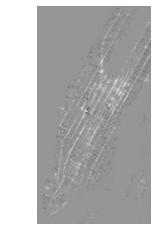

In [60]:
# Pandas and NumPy
# Remember that pandas is based on NumPy, and that it is quite
# common to leverage both libraries in complex data analysis tasks.
# A natural workflow is to start loading and manipulating data with
# pandas, and then switch to NumPy when complex mathematical
# operations are to be performed on arrays. As a rule of thumb, pandas
# excels at filtering, selecting, grouping, and other data manipulations,
# whereas NumPy is particularly efficient at vector mathematical
# operations on numerical arrays.

pickup = data[['pickup_longitude', 'pickup_latitude']].values
dropoff = data[['dropoff_longitude', 'dropoff_latitude']].values

evening = (data.pickup_datetime.dt.hour >= 19).values
n = np.sum(evening)

weights = np.zeros(2 * n)
weights[:n] = -1
weights[n:] = +1

points = np.r_[pickup[evening],dropoff[evening]]

def lat_lon_to_pixels(lat, lon):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lon + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

lon, lat = points.T
x, y = lat_lon_to_pixels(lat, lon)

lon_min, lat_min = -74.0214, 40.6978
lon_max, lat_max = -73.9524, 40.7982

x_min, y_min = lat_lon_to_pixels(lat_min, lon_min)
x_max, y_max = lat_lon_to_pixels(lat_max, lon_max)

bin = .00003
bins_x = np.arange(x_min, x_max, bin)
bins_y = np.arange(y_min, y_max, bin)

grid, _, _ = np.histogram2d(y, x, weights=weights,bins=(bins_y, bins_x))

density = 1. / (1. + np.exp(-.5 * grid))

plt.imshow(density,origin='lower',interpolation='bicubic')
plt.axis('off')